# Submit MD simulation requests

In [4]:
import pandas as pd
csvfile = "/home/yzhang/Documents/Personal_documents/BetaPose/test110.csv"; 
table = pd.read_csv(csvfile, index_col=0); 
table["distA"] = table["distA"].astype(float)

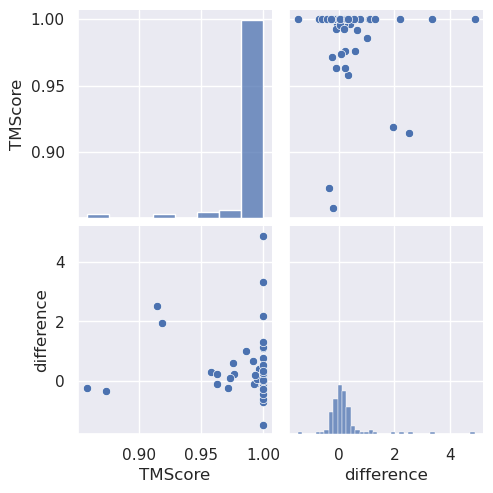

In [18]:
import seaborn as sns; sns.set();
t1 = table[["TMScore","difference"]]

st = (table.TMScore>0.8) * (table.difference<5)
t2 = t1[st]
# t2 = table[table.distA>30]
sns.pairplot(t2)
# t2

In [4]:
from BetaPose.session_prep import MDPost
import multiprocessing as mp; 
import time; 
import pandas as pd


def domd(jobid):
  time.sleep(int(time.perf_counter().__str__()[-3:])/3000);
  print(f"Working with the session ID: {jobid}")
  mdpost = MDPost()
  mdpost.jobid = jobid; 
  mdpost.nrsteps = 5000; 
  mdpost.interval = 100; 
  mdpost.nrcopy = 1; 
  mdpost.submit(); 
  return mdpost.data

In [ ]:
csvfile = "/home/miemie/Dropbox/Documents/BetaPose/AfterPrep_108_142.csv"; 
csvfile = "/storage006/yzhang/tests/BetaPose/AfterPrep_108_142.csv"; 
table = pd.read_csv(csvfile, index_col=0); 
session_ids = table.sess_id.to_numpy().astype(str); 
session_ids = session_ids
session_ids

pool = mp.Pool(10);
results = pool.starmap(domd, [(i,) for i in session_ids]);
pool.close();
pool.join();
print(results)
# with open("MD_submissions.json", "w") as file1: 
#   json.dump(results, file1)

Working with the session ID: C4001QBO
Working with the session ID: C4001Y6Q
Working with the session ID: C4002A8G
Working with the session ID: C4003B68
Working with the session ID: C4001DHI
Working with the session ID: C4003BGQ
Working with the session ID: C4001GPN
Working with the session ID: C4001FKI
Working with the session ID: C4001MQ5
Working with the session ID: C4002D0K
22-11-16T14:14:04 : Simulation C4003B68 - Simulation job is successfully complete. The latest trajectory ID is C008C4003B68
22-11-16T14:14:04 : Simulation C4003B68 - The return message is: <Job summary: 1 jobs finished; 1 jobs succeed and 0 jobs failed. Latest worked trajectory id is C008C4003B68; Please view the details via the trajectory controller panel;>
Working with the session ID: C4001B05
22-11-16T14:16:24 : Simulation C4002A8G - Simulation job is successfully complete. The latest trajectory ID is C010C4002A8G
22-11-16T14:16:24 : Simulation C4002A8G - The return message is: <Job summary: 1 jobs finished; 1

In [24]:
from BetaPose.session_prep import MDPost
import time; 
def domd(jobid, parms={}):
  time.sleep(int(time.perf_counter().__str__()[-3:])/3000);
  print(f"Working with the session ID: {jobid}")
  mdpost = MDPost()
  mdpost.jobid = jobid; 
  mdpost.nrsteps = 5000; 
  mdpost.interval = 100; 
  mdpost.nrcopy = 1; 
  
  mdpost.update(parms)
  
  mdpost.submit(); 
  return mdpost.data

otherparms={
#   'equil1_ensemble': 'nvt',
#   'equil1_temp': '370',
#   'equil1_timestep': '0.00001',
#   'equil1_nrsteps': '5000',
#   'equil1_tctime': '0.001',
#   'equil2_ensemble': 'nvt',
#   'equil2_temp': '345',
#   'equil2_timestep': '0.0001',
#   'equil2_nrsteps': '5000',
#   'equil2_tctime': '0.001',
#   'equil3_ensemble': 'nvt',
#   'equil3_temp': '300',
#   'equil3_timestep': '0.001',
#   'equil3_nrsteps': '5000',
#   'equil3_tctime': '0.01',
#   'equil4_ensemble': 'nvt',
#   'equil4_temp': '298',
#   'equil4_timestep': '0.002',
#   'equil4_nrsteps': '5000',
#   'equil4_tctime': '0.1',
#   'equil5_ensemble': 'npt',
#   'equil5_temp': '298',
#   'equil5_timestep': '0.002',
#   'equil5_nrsteps': '20000',
#   'equil5_tctime': '0.1'
}
timesteps = [0.0001, 0.0005, 0.00075, 0.001, 0.002]; 
ensembles = ["nvt","nvt","nvt","npt","npt"]; 
temperatures = [370, 345, 300, 298, 298]; 

otherparms = addequil({}, timesteps, ensembles, temperatures, nrstep=getnrsteps, tctime=gettctime); 

domd("C4002OGY", otherparms)

equil1
equil2
equil3
equil4
equil5
Working with the session ID: C4002OGY
22-11-17T11:47:22 : Simulation C4002OGY - Simulation job is successfully complete. The latest trajectory ID is C009C4002OGY
22-11-17T11:47:22 : Simulation C4002OGY - The return message is: <Job summary: 1 jobs finished; 1 jobs succeed and 0 jobs failed. Latest worked trajectory id is C009C4002OGY; Please view the details via the trajectory controller panel;>


{'cmd': 'runsmdsim',
 'JOBID': 'C4002OGY',
 'sim_ifexp': 'true',
 'sim_ifequil': 'false',
 'sim_ifimp': 'false',
 'sim_nrcopy': 1,
 'prod_outputformat': 'netcdf',
 'prod_outputgroup': 'all',
 'prod_nrsteps': 5000,
 'prod_outinterval': 100,
 'prod_prodeng': 'gmxmd',
 'prod_ensemble': 'npt',
 'prod_temp': '298',
 'prod_pressure': '1.00',
 'prod_timestep': '0.002',
 'sim_ifrestart': 'false',
 'sim_rstfrom': 'false',
 'sim_haslig': 'true',
 'sim_ifreconly': 'false',
 'sim_slotsel': '0',
 'sim_initbox': '-1',
 'sim_neuiontype': 'kcl',
 'sim_solmod': 'tip3p',
 'sim_ionconc': '0.15',
 'sim_forcefield': 'charmm36',
 'sim_equilnr': '6',
 'equil0_ensemble': 'em',
 'equil0_eng': 'gmxem',
 'equil0_temp': '0',
 'equil0_timestep': '0',
 'equil0_nrsteps': '5000',
 'equil1_ensemble': 'nvt',
 'equil1_eng': 'gmxmd',
 'equil1_temp': 370,
 'equil1_timestep': 0.0001,
 'equil1_nrsteps': 100000,
 'equil1_tctime': 0.002,
 'equil2_ensemble': 'nvt',
 'equil2_eng': 'gmxmd',
 'equil2_temp': 345,
 'equil2_timestep

In [23]:
EQLENGTH = 50

def getnrsteps(val, length = 50):
  return int(length/float(val)); 
def gettctime(val, factor = 20):
  return round(float(val)*factor, 5); 

def addequil(dic, timesteps, ensembles, temperatures, nrstep=None, tctime=None):
  if len(timesteps) != len(ensembles) or len(timesteps) != len(temperatures): 
    print("Number of the equilibration description is not equil")
    return 
  for i in range(len(timesteps)): 
    eqname = f"equil{i+1}"; 
    ts = float(timesteps[i]); 
    ensemble = str(ensembles[i]); 
    temp = int(temperatures[i]); 
    if callable(nrstep): 
      nrsteps = nrstep(ts)
    else: 
      nrsteps = 20000
    if callable(tctime): 
      ct = tctime(ts)
    else: 
      ct = 0.1
    dic[f"{eqname}_ensemble"] = ensemble; 
    dic[f"{eqname}_tctime"] = ct; 
    dic[f"{eqname}_nrsteps"] = nrsteps; 
    dic[f"{eqname}_timestep"] = ts; 
    dic[f"{eqname}_temp"] = temp; 
    if dic[f"{eqname}_nrsteps"] > 1e5: 
      dic[f"{eqname}_nrsteps"] = 100000; 
  return dic

# otherparms={
#   'equil1_ensemble': 'nvt',
#   'equil1_temp': '370',
#   'equil1_timestep': '0.0001',
#   'equil1_nrsteps': int(EQLENGTH/float(otherparms['equil1_timestep'])),
#   'equil1_tctime': float(otherparms['equil1_timestep'])*20,
#   'equil2_ensemble': 'nvt',
#   'equil2_temp': '345',
#   'equil2_timestep': '0.0005',
#   'equil2_nrsteps': int(EQLENGTH/float(otherparms['equil2_timestep'])),
#   'equil2_tctime': float(otherparms['equil2_timestep'])*20,
#   'equil3_ensemble': 'nvt',
#   'equil3_temp': '300',
#   'equil3_timestep': '0.0008',
#   'equil3_nrsteps': int(EQLENGTH/float(otherparms['equil3_timestep'])),
#   'equil3_tctime': '0.01',
#   'equil4_ensemble': 'nvt',
#   'equil4_temp': '298',
#   'equil4_timestep': '0.001',
#   'equil4_nrsteps': int(EQLENGTH/float(otherparms['equil4_timestep'])),
#   'equil4_tctime': '0.1',
#   'equil5_ensemble': 'npt',
#   'equil5_temp': '298',
#   'equil5_timestep': '0.002',
#   'equil5_nrsteps': 25000,
#   'equil5_tctime': '0.1'
# }

timesteps = [0.0001, 0.0005, 0.00075, 0.001, 0.002]; 
ensembles = ["nvt","nvt","nvt","npt","npt"]
temperatures = [370, 345, 300, 298, 298]

addequil({}, timesteps, ensembles, temperatures, nrstep=getnrsteps, tctime=gettctime)


equil1
equil2
equil3
equil4
equil5


{'equil1_ensemble': 'nvt',
 'equil1_tctime': 0.002,
 'equil1_nrsteps': 100000,
 'equil1_timestep': 0.0001,
 'equil1_temp': 370,
 'equil2_ensemble': 'nvt',
 'equil2_tctime': 0.01,
 'equil2_nrsteps': 100000,
 'equil2_timestep': 0.0005,
 'equil2_temp': 345,
 'equil3_ensemble': 'nvt',
 'equil3_tctime': 0.015,
 'equil3_nrsteps': 66666,
 'equil3_timestep': 0.00075,
 'equil3_temp': 300,
 'equil4_ensemble': 'npt',
 'equil4_tctime': 0.02,
 'equil4_nrsteps': 50000,
 'equil4_timestep': 0.001,
 'equil4_temp': 298,
 'equil5_ensemble': 'npt',
 'equil5_tctime': 0.04,
 'equil5_nrsteps': 25000,
 'equil5_timestep': 0.002,
 'equil5_temp': 298}

In [2]:
import pytraj as pt
a = "/storage006/yzhang/clean_acgui/scratch/C4002IDW/534c0bf6bf6144a05ff8fbb505a59a35/C004C4002IDW/eq_input.pdb"
traj = pt.load(a, top=a)
print(traj.top)

RuntimeError: n_atoms = 0: make sure to load correct Topology filename or load supported topology (pdb, amber parm, psf, ...)

In [3]:
class test():
  def __init__(self):
    self.id="THISTEST"
    
  def log(func):
    def func_(self):
      print(f"Prefix: {self.id} ", end="")
      func(self)
    return func_

  @log
  def print_(self):
    print("Hello")

a=test()
a.print_()
  

Prefix: THISTEST Hello


In [11]:
import time
for i in range(10): 
  print(time.perf_counter().__str__()[-3:])

721
182
634
615
306
057
437
717
017
417


[[-2.   1. ]
 [ 1.5 -0.5]]


<AxesSubplot:>

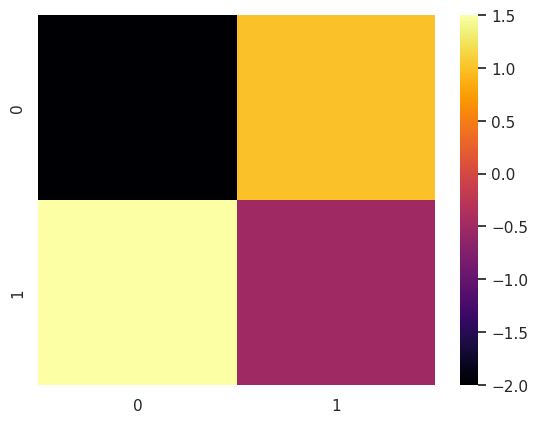

In [12]:
import numpy 
from numpy.linalg import inv
import seaborn as sns; sns.set()
a = numpy.array([[1., 2.], [3., 4.]])
ainv = inv(a)
print(ainv)
sns.heatmap(ainv, cmap="inferno")